In [2]:
import numpy as np
import math as m
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Линейная конгруэнтная последовательность, определенная числами **m**, **a**, **c** и **X_0** периодична с периодом, не превышающим **m**. При этом длина периода равна **m** тогда и только тогда, когда:  
1) Числа **c** и **m** взаимно простые  
2) **b=a-1** кратно **p** для каждого простого **p**, являющегося делителем **m**  
3) **b** кратно **4**, если **m** кратно **4**

[ 9.64824121 10.55276382 10.25125628 10.55276382  9.94974874 10.55276382
 16.88442211 11.15577889 10.25125628]


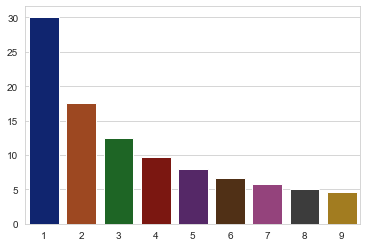

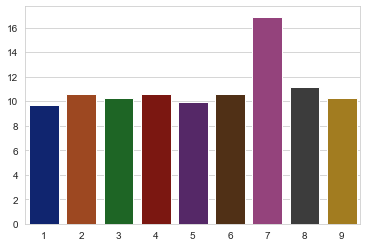

In [3]:
#Начальные условия:

while True:
    bol = 0
    A = 5 #int(input("Enter value A: "))
    B = 3 #int(input("Enter value B: "))
    M = 997 #int(input("Enter value M: "))
    x0 = 0 #int(input("Enter value x0: "))
    
    
##Проверка условий:
#1)Взаимно-простые М и В:
    minValue = min(M, B)
    for i in range(2, minValue+1):
        if (M%i == 0 and B%i == 0):
            print("Entered values do not match the conditions (1)")
            break
    else:
        bol += 1
        
#2)A-1 делится на все простые делители числа M:
    for i in range(2, M):
        if (M%i == 0 and (A-1)%i != 0):
            print("Entered values do not match the conditions (2)")
            break
    else:
        bol += 1
    
#Если M%4 == 0, то и A-1 тоже должен быть кратен трём:
    if (M%4 == 0 and A%4 != 0):
        print("Entered values do not match the conditions (3)")
    else:
        bol += 1
        
    if bol == 3:
        break
      
    
    
    
x = x0
list_X = np.array([])
list_Y = np.array([])
list_Z = np.array([])
list_Benford_X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
list_Benford_Y = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])

#Получение значений псевдослучайных чисел и добавление первых цифр каждого псевдослучайного числа в масссив:
for i in range(M-2):
    X = (x*A + B)%M
    while X > 9:
        X //= 10
    list_Z = np.append(list_Z, (x*A + B)%M)
    list_X = np.append(list_X, X)
    x = (x*A + B)%M
    
# print(listZ[:100])
# print(listX[:100])
list_X = np.sort(list_X)
    
#Рассчёт вероятности появления определённой первой значащей цифры из наших псевдослучайных чисел:    
for i in range(len(list_Benford_X)):
    list_Y = np.append(list_Y, 0)
    for j in range(len(list_X)):
        if (list_Benford_X[i] == list_X[j]):
            list_Y[i] += 1
    list_Y[i] = list_Y[i] / len(list_X) * 100  # вычисляем вероятность   
            

print(list_Y) 

sns.set_style('whitegrid')
axes = sns.barplot(x = list_Benford_X, y = list_Benford_Y, palette = 'dark')
fig, axs = plt.subplots(1, 1)
axes = sns.barplot(x = list_Benford_X, y = list_Y, palette = 'dark')